# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("/Users/adityamurali/Documents/MDST/data/states_edu.csv")

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [3]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

How many years of data are logged in our dataset? 

In [4]:
#print(df["YEAR"].unique())
print(df.columns)

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [5]:
michigan_rows = df['PRIMARY_KEY'].str.contains('MICHIGAN')
#all the rows that have michigan
michigan_df = df[michigan_rows]
average_michigan_scores = michigan_df['GRADES_8_G'].mean()

#all the rows that have Ohio
Ohio_rows = df['PRIMARY_KEY'].str.contains('OHIO')
Ohio_df = df[Ohio_rows]
average_Ohio_scores = Ohio_df['GRADES_8_G'].mean()

if average_michigan_scores > average_Ohio_scores:
    print("Michigan has a higher average 8th grade math score than Ohio.")
else:
    print("Ohio has a higher average 8th grade math score than Michigan.")


Ohio has a higher average 8th grade math score than Michigan.


Find the average for your chosen test across all states in 2019

In [6]:
states_rows = df['PRIMARY_KEY'].str.contains('2019')
states_rows_df = df[states_rows]
average_2019_math_scores = states_rows_df['AVG_MATH_8_SCORE'].mean()
print(average_2019_math_scores)


281.2641509433962


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [7]:
states = df.groupby("STATE")
print(states['AVG_MATH_8_SCORE'].max())    

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [8]:
#Filling NaN values in Average Reading and Math scores with median values
median_value1 = df['AVG_READING_8_SCORE'].median()
median_value2 = df['AVG_MATH_4_SCORE'].median()
median_value3 = df['AVG_MATH_8_SCORE'].median()

df['AVG_READING_8_SCORE'] = df['AVG_READING_8_SCORE'].fillna(median_value1)
df['AVG_MATH_4_SCORE'] = df['AVG_MATH_4_SCORE'].fillna(median_value2)
df['AVG_MATH_8_SCORE'] = df['AVG_MATH_8_SCORE'].fillna(median_value3)


In [9]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [10]:
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,265.0
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,238.0,280.5,NaN,265.0
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,265.0
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,265.0
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,265.0


Feature engineering justification: First, I filled the NaN values of Enroll, the total number of students of each state, with their median values. I didn't want to impute the value of 0 for the NaN values because that is not possible. Moreover, I didn't use the mean because it would be influenced by outliers(populations of larger or smaller states). Therefore, I picked the median value. 

The rows that had NaN values in certain revenue and expenditure columns weren't making up a large dataset, so I dropped those rows. 

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0.5, 1.0, 'Relationship between Average 8th Grade Reading and Math Scores')

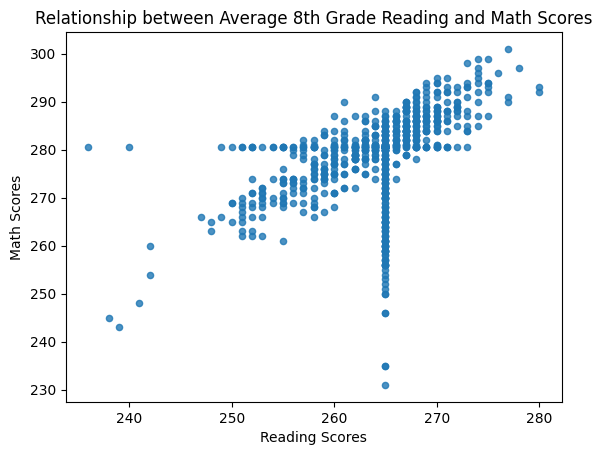

In [11]:
df.plot.scatter(x = 'AVG_READING_8_SCORE', y = 'AVG_MATH_8_SCORE', alpha = 0.8)
plt.xlabel('Reading Scores')
plt.ylabel('Math Scores')
plt.title('Relationship between Average 8th Grade Reading and Math Scores')

Visualising the relationship between average 8th reading and math scores. 

**Visualization 2**

Text(0.5, 1.0, 'Relationship between 4th and 8th Grade Math Scores')

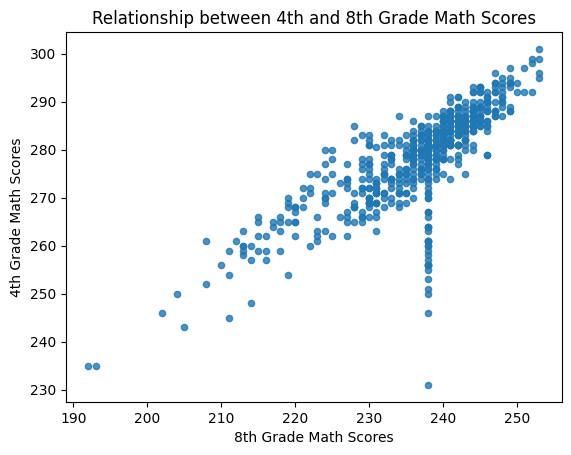

In [12]:
df.plot.scatter(x = 'AVG_MATH_4_SCORE', y = 'AVG_MATH_8_SCORE', alpha = 0.8)
plt.xlabel('8th Grade Math Scores')
plt.ylabel('4th Grade Math Scores')
plt.title('Relationship between 4th and 8th Grade Math Scores')

Visualising the relationship between average 4th and 8th grade math scores. 

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df[['AVG_READING_8_SCORE', 'AVG_MATH_4_SCORE']] 
y = df.loc[X.index]['AVG_MATH_8_SCORE'] 
print(df['AVG_READING_8_SCORE'].isna().sum())
print(df['AVG_MATH_4_SCORE'].isna().sum())
print(df['AVG_MATH_8_SCORE'].isna().sum())

0
0
0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [16]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [17]:
# create your model here
model = LinearRegression() 

In [18]:
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)

In [20]:
print(model.intercept_)
print(model.coef_)


-13.481005461564962
[0.40030799 0.78867376]


## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [21]:
#R^2
print(model.score(X_test, y_test))
# mean error
print(np.mean(model.predict(X_test)-y_test))
# root mean squared error -- penalizes large errors
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)

0.6139780026856879
-0.13209536812299108
3.8426262130560223


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

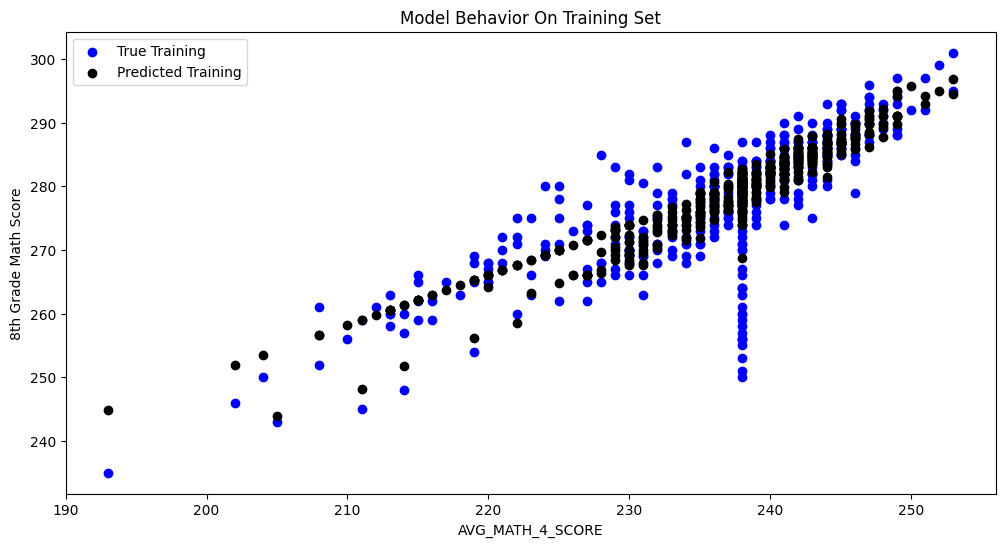

In [24]:
col_name = 'AVG_MATH_4_SCORE'
f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "blue")
plt.scatter(X_train[col_name], model.predict(X_train), color = "black")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Model Behavior On Training Set")

In [ ]:
col_name = 'AVG_MATH_4_SCORE'
f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "blue")
plt.scatter(X_train[col_name], model.predict(X_train), color = "black")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Model Behavior On Training Set")

<h2> Summary </h2>

It seems like we do have an accurate model; however, there were many outliers which may have hindered its accuracy. 
However, we are able to clearly appreciate the relationship between the average 4th grade math score and 8th grade math score. 
